# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new Jupyter notebook for your code-along:

Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [2]:
# Creating arrays
a = np.zeros(3)
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [3]:
# Note the way each array is printed:
a,b,c,d

(array([ 0.,  0.,  0.]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[[6, 5, 6, 2],
         [8, 1, 8, 5],
         [8, 2, 7, 2]],
 
        [[3, 2, 2, 1],
         [1, 6, 7, 5],
         [5, 1, 3, 8]]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [6]:
type(a[0])

numpy.float64

In [7]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [8]:
## Arithmetic in arrays is element wise
a * 5

array([100, 150, 200, 250])

In [9]:
c = a-b
c

array([20, 29, 38, 47])

In [10]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [11]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [12]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [13]:
a[2:5]

array([ 4,  9, 16])

In [ ]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [15]:
b = np.random.randint(1,100,(4,4))

In [16]:
b

array([[51, 40, 73, 81],
       [51, 82, 84, 58],
       [12, 37, 17, 43],
       [81,  7, 75, 17]])

In [17]:
# Guess the output
print(b[2,3])

43


In [18]:
print(b[0,0])

51


In [20]:
b[0:3,1],b[1:,:]

(array([40, 82, 37]), array([[51, 82, 84, 58],
        [12, 37, 17, 43],
        [81,  7, 75, 17]]))

In [ ]:
b[1:3,:]

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [7]:
df

,A,B,C,D
2014-01-01,-0.914225,0.535033,0.383646,0.383753
2014-01-02,-1.083778,1.871858,-1.053604,-1.312443
2014-01-03,1.018421,0.789039,-0.347092,-2.099482
2014-01-04,0.167017,0.800293,0.454247,1.150916
2014-01-05,-1.066729,1.218763,0.752176,0.792962
2014-01-06,0.800552,-0.963729,0.392953,1.084616


In [8]:
# Index, columns, underlying numpy data
df.T

,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00
A,-0.914225,-1.083778,1.018421,0.167017,-1.066729,0.800552
B,0.535033,1.871858,0.789039,0.800293,1.218763,-0.963729
C,0.383646,-1.053604,-0.347092,0.454247,0.752176,0.392953
D,0.383753,-1.312443,-2.099482,1.150916,0.792962,1.084616


In [9]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [10]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [11]:
type(df2.E[0])

str

In [12]:
print(np.array([3] *4))

[3 3 3 3]


#### Viewing Data

In [13]:
df.head()

,A,B,C,D
2014-01-01,-0.914225,0.535033,0.383646,0.383753
2014-01-02,-1.083778,1.871858,-1.053604,-1.312443
2014-01-03,1.018421,0.789039,-0.347092,-2.099482
2014-01-04,0.167017,0.800293,0.454247,1.150916
2014-01-05,-1.066729,1.218763,0.752176,0.792962


In [16]:
df.tail(2)

,A,B,C,D
2014-01-05,-1.066729,1.218763,0.752176,0.792962
2014-01-06,0.800552,-0.963729,0.392953,1.084616


In [17]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.179790,0.708543,0.097054,0.000054
std,0.965433,0.943941,0.670484,1.371669
min,-1.083778,-0.963729,-1.053604,-2.099482
25%,-1.028603,0.598535,-0.164407,-0.888394
50%,-0.373604,0.794666,0.388300,0.588357
75%,0.642169,1.114146,0.438924,1.011702
max,1.018421,1.871858,0.752176,1.150916


In [19]:
df.sort_values(by='B')

,A,B,C,D
2014-01-06,0.800552,-0.963729,0.392953,1.084616
2014-01-01,-0.914225,0.535033,0.383646,0.383753
2014-01-03,1.018421,0.789039,-0.347092,-2.099482
2014-01-04,0.167017,0.800293,0.454247,1.150916
2014-01-05,-1.066729,1.218763,0.752176,0.792962
2014-01-02,-1.083778,1.871858,-1.053604,-1.312443


### Selection

In [21]:
df[['A']]

,A
2014-01-01,-0.914225
2014-01-02,-1.083778
2014-01-03,1.018421
2014-01-04,0.167017
2014-01-05,-1.066729
2014-01-06,0.800552


In [22]:
df[['A','D']]

,A,D
2014-01-01,-0.914225,0.383753
2014-01-02,-1.083778,-1.312443
2014-01-03,1.018421,-2.099482
2014-01-04,0.167017,1.150916
2014-01-05,-1.066729,0.792962
2014-01-06,0.800552,1.084616


In [23]:
df[0:3]

,A,B,C,D
2014-01-01,-0.914225,0.535033,0.383646,0.383753
2014-01-02,-1.083778,1.871858,-1.053604,-1.312443
2014-01-03,1.018421,0.789039,-0.347092,-2.099482


In [24]:
# By label
df.loc[dates[1]]

A   -1.083778
B    1.871858
C   -1.053604
D   -1.312443
Name: 2014-01-02 00:00:00, dtype: float64

In [25]:
# multi-axis by label
df.loc[:,['A','D']]

,A,D
2014-01-01,-0.914225,0.383753
2014-01-02,-1.083778,-1.312443
2014-01-03,1.018421,-2.099482
2014-01-04,0.167017,1.150916
2014-01-05,-1.066729,0.792962
2014-01-06,0.800552,1.084616


In [26]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,1.871858
2014-01-03,0.789039
2014-01-04,0.800293


In [27]:
# Fast access to scalar
df.at[dates[1],'B']

1.8718580617741571

In [28]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2014-01-04,0.167017,0.800293,0.454247,1.150916
2014-01-05,-1.066729,1.218763,0.752176,0.792962
2014-01-06,0.800552,-0.963729,0.392953,1.084616


### Boolean Indexing

In [29]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-01,-0.914225,0.535033,0.383646,0.383753
2014-01-02,-1.083778,1.871858,-1.053604,-1.312443
2014-01-05,-1.066729,1.218763,0.752176,0.792962


### Setting

Copy data frame, select all rows where column A value is less than zero and reverse the sign

In [30]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [31]:
df_posA

,A,B,C,D
2014-01-01,0.914225,-0.535033,-0.383646,-0.383753
2014-01-02,1.083778,-1.871858,1.053604,1.312443
2014-01-03,1.018421,0.789039,-0.347092,-2.099482
2014-01-04,0.167017,0.800293,0.454247,1.150916
2014-01-05,1.066729,-1.218763,-0.752176,-0.792962
2014-01-06,0.800552,-0.963729,0.392953,1.084616


In [32]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [33]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [34]:
df['F'] = s1

In [35]:
df

,A,B,C,D,F
2014-01-01,-0.914225,0.535033,0.383646,0.383753,NaN
2014-01-02,-1.083778,1.871858,-1.053604,-1.312443,1.0
2014-01-03,1.018421,0.789039,-0.347092,-2.099482,2.0
2014-01-04,0.167017,0.800293,0.454247,1.150916,3.0
2014-01-05,-1.066729,1.218763,0.752176,0.792962,4.0
2014-01-06,0.800552,-0.963729,0.392953,1.084616,5.0


### Missing Data

In [36]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [37]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [38]:
df1

,A,B,C,D,F,E
2014-01-01,-0.914225,0.535033,0.383646,0.383753,NaN,1.0
2014-01-02,-1.083778,1.871858,-1.053604,-1.312443,1.0,1.0
2014-01-03,1.018421,0.789039,-0.347092,-2.099482,2.0,NaN
2014-01-04,0.167017,0.800293,0.454247,1.150916,3.0,NaN


In [39]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [40]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,-0.179790,0.708543,0.097054,0.000054,3.000000
std,0.965433,0.943941,0.670484,1.371669,1.581139
min,-1.083778,-0.963729,-1.053604,-2.099482,1.000000
25%,-1.028603,0.598535,-0.164407,-0.888394,2.000000
50%,-0.373604,0.794666,0.388300,0.588357,3.000000
75%,0.642169,1.114146,0.438924,1.011702,4.000000
max,1.018421,1.871858,0.752176,1.150916,5.000000


In [41]:
df.mean(),df.mean(1) # Operation on two different axes

(A   -0.179790
 B    0.708543
 C    0.097054
 D    0.000054
 F    3.000000
 dtype: float64, 2014-01-01    0.097052
 2014-01-02   -0.115593
 2014-01-03    0.272177
 2014-01-04    1.114495
 2014-01-05    1.139434
 2014-01-06    1.262879
 Freq: D, dtype: float64)

### Applying functions

In [42]:
df

,A,B,C,D,F
2014-01-01,-0.914225,0.535033,0.383646,0.383753,NaN
2014-01-02,-1.083778,1.871858,-1.053604,-1.312443,1.0
2014-01-03,1.018421,0.789039,-0.347092,-2.099482,2.0
2014-01-04,0.167017,0.800293,0.454247,1.150916,3.0
2014-01-05,-1.066729,1.218763,0.752176,0.792962,4.0
2014-01-06,0.800552,-0.963729,0.392953,1.084616,5.0


In [43]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,-0.914225,0.535033,0.383646,0.383753,NaN
2014-01-02,-1.998002,2.406891,-0.669958,-0.928690,1.0
2014-01-03,-0.979582,3.195930,-1.017049,-3.028172,3.0
2014-01-04,-0.812564,3.996223,-0.562802,-1.877256,6.0
2014-01-05,-1.879294,5.214987,0.189374,-1.084294,10.0
2014-01-06,-1.078741,4.251258,0.582327,0.000322,15.0


In [44]:
df.apply(lambda x: x.max() - x.min())

A    2.102198
B    2.835587
C    1.805779
D    3.250398
F    4.000000
dtype: float64

In [45]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [46]:
np.random.randn(10,4)

array([[ 0.01466987,  0.18098568, -0.05724347,  0.0146158 ],
       [-0.45441894, -0.96362061,  0.61597443,  0.56238787],
       [-0.04318507,  2.42030147,  1.08313853, -0.94083617],
       [-0.06178331, -0.53056596, -2.57110586, -1.30837739],
       [ 1.0858582 , -0.02521755,  1.96465581, -1.48472091],
       [ 0.66841883, -0.24951755, -2.22800041,  0.94147299],
       [-0.97099509, -1.65856519, -0.40453649, -0.08990092],
       [ 0.9095716 ,  0.23411052,  0.09723863, -1.04647541],
       [-0.84909445,  0.31264262,  1.07680252,  0.36518271],
       [ 0.99283772, -0.35258493, -1.6453422 ,  0.02968033]])

In [47]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.839765,1.436764,1.903551,0.326221
1,-0.639955,1.395465,0.456662,-0.586944
2,-1.506307,1.089691,-0.853029,0.460823
3,-0.829264,-0.064171,-1.253206,-0.258565
4,0.205670,0.017341,0.329764,-0.578751
5,-1.170146,-0.844371,0.398046,-1.092692
6,0.944019,-0.108641,1.486574,0.009364
7,2.389177,0.299963,-0.403358,-0.052139
8,-0.230368,1.091114,-0.020244,0.207923
9,0.551690,0.351176,0.550249,1.923353


In [48]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.839765  1.436764  1.903551  0.326221
 1 -0.639955  1.395465  0.456662 -0.586944
 2 -1.506307  1.089691 -0.853029  0.460823,
           0         1         2         3
 3 -0.829264 -0.064171 -1.253206 -0.258565
 4  0.205670  0.017341  0.329764 -0.578751
 5 -1.170146 -0.844371  0.398046 -1.092692
 6  0.944019 -0.108641  1.486574  0.009364,
           0         1         2         3
 7  2.389177  0.299963 -0.403358 -0.052139
 8 -0.230368  1.091114 -0.020244  0.207923
 9  0.551690  0.351176  0.550249  1.923353]

In [49]:
pd.concat(pieces)

,0,1,2,3
0,-0.839765,1.436764,1.903551,0.326221
1,-0.639955,1.395465,0.456662,-0.586944
2,-1.506307,1.089691,-0.853029,0.460823
3,-0.829264,-0.064171,-1.253206,-0.258565
4,0.205670,0.017341,0.329764,-0.578751
5,-1.170146,-0.844371,0.398046,-1.092692
6,0.944019,-0.108641,1.486574,0.009364
7,2.389177,0.299963,-0.403358,-0.052139
8,-0.230368,1.091114,-0.020244,0.207923
9,0.551690,0.351176,0.550249,1.923353


In [50]:
# Also can "Join" and "Append"
df

,0,1,2,3
0,-0.839765,1.436764,1.903551,0.326221
1,-0.639955,1.395465,0.456662,-0.586944
2,-1.506307,1.089691,-0.853029,0.460823
3,-0.829264,-0.064171,-1.253206,-0.258565
4,0.205670,0.017341,0.329764,-0.578751
5,-1.170146,-0.844371,0.398046,-1.092692
6,0.944019,-0.108641,1.486574,0.009364
7,2.389177,0.299963,-0.403358,-0.052139
8,-0.230368,1.091114,-0.020244,0.207923
9,0.551690,0.351176,0.550249,1.923353


### Grouping


In [51]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [52]:
df

,A,B,C,D
0,foo,one,0.489213,-0.104657
1,bar,one,-1.206456,-1.320884
2,foo,two,-1.028487,-1.747849
3,bar,three,-0.238381,0.657272
4,foo,two,-1.019007,2.790787
5,bar,two,0.983204,1.832380
6,foo,one,-0.264766,0.471347
7,foo,three,0.022818,-0.704154


In [53]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.206456 -1.320884
    three -0.238381  0.657272
    two    0.983204  1.832380
foo one    0.224448  0.366690
    three  0.022818 -0.704154
    two   -2.047494  1.042938

### Time Series


In [54]:
import pandas as pd
import numpy as np

In [55]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [56]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [57]:
ts

2014-01-01 00:00:00    474
2014-01-01 00:00:01    295
2014-01-01 00:00:02    382
2014-01-01 00:00:03    422
2014-01-01 00:00:04    405
2014-01-01 00:00:05    215
2014-01-01 00:00:06    123
2014-01-01 00:00:07     45
2014-01-01 00:00:08    256
2014-01-01 00:00:09    407
2014-01-01 00:00:10    330
2014-01-01 00:00:11    126
2014-01-01 00:00:12    330
2014-01-01 00:00:13    104
2014-01-01 00:00:14    316
2014-01-01 00:00:15    208
2014-01-01 00:00:16    346
2014-01-01 00:00:17     12
2014-01-01 00:00:18    471
2014-01-01 00:00:19    221
2014-01-01 00:00:20    110
2014-01-01 00:00:21    329
2014-01-01 00:00:22     11
2014-01-01 00:00:23    249
2014-01-01 00:00:24     42
2014-01-01 00:00:25    430
2014-01-01 00:00:26    130
2014-01-01 00:00:27     67
2014-01-01 00:00:28    108
2014-01-01 00:00:29    337
                      ... 
2014-01-01 00:01:10      6
2014-01-01 00:01:11    462
2014-01-01 00:01:12    246
2014-01-01 00:01:13      1
2014-01-01 00:01:14    136
2014-01-01 00:01:15    257
2

In [58]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    239.800
2014-01-01 00:01:00    238.925
Freq: T, dtype: float64

In [60]:
# Many additional time series features
ts.compress #use tab

<bound method Series.compress of 2014-01-01 00:00:00    474
2014-01-01 00:00:01    295
2014-01-01 00:00:02    382
2014-01-01 00:00:03    422
2014-01-01 00:00:04    405
2014-01-01 00:00:05    215
2014-01-01 00:00:06    123
2014-01-01 00:00:07     45
2014-01-01 00:00:08    256
2014-01-01 00:00:09    407
2014-01-01 00:00:10    330
2014-01-01 00:00:11    126
2014-01-01 00:00:12    330
2014-01-01 00:00:13    104
2014-01-01 00:00:14    316
2014-01-01 00:00:15    208
2014-01-01 00:00:16    346
2014-01-01 00:00:17     12
2014-01-01 00:00:18    471
2014-01-01 00:00:19    221
2014-01-01 00:00:20    110
2014-01-01 00:00:21    329
2014-01-01 00:00:22     11
2014-01-01 00:00:23    249
2014-01-01 00:00:24     42
2014-01-01 00:00:25    430
2014-01-01 00:00:26    130
2014-01-01 00:00:27     67
2014-01-01 00:00:28    108
2014-01-01 00:00:29    337
                      ... 
2014-01-01 00:01:10      6
2014-01-01 00:01:11    462
2014-01-01 00:01:12    246
2014-01-01 00:01:13      1
2014-01-01 00:01:14   

### Plotting


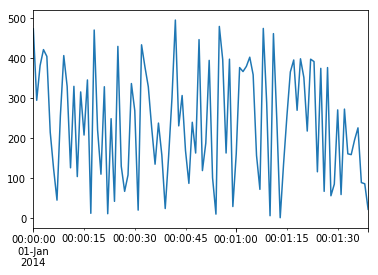

In [61]:
ts.plot()

In [62]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

In [91]:
import numpy as np
import matplotlib.pyplot as plt
def randwalk_manual(points):
    walk = [0,]
    for i in range(points):
        step = np.random.uniform(-1,1)
        walk.append(walk[i] + step)
    plt.plot(walk)
    return(walk)

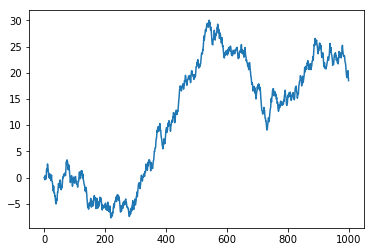

In [99]:
b = randwalk_manual(1000)

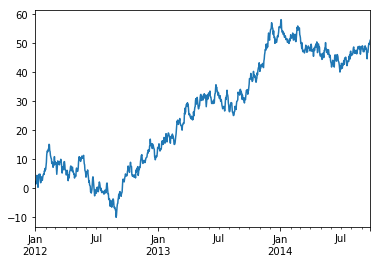

In [101]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [ ]:
# Pandas plot function will print with labels as default

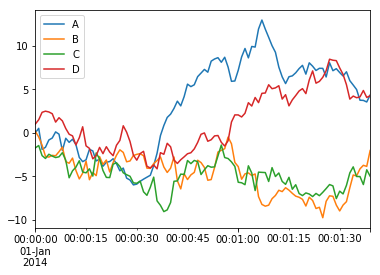

In [102]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas